In [515]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [516]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename,skip_blank_lines=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [517]:
len(titanic_df['PassengerId'].unique())

891

In [518]:
#Drop Unused Columns
titanic_df = titanic_df.drop(['SibSp','Parch','Ticket','Cabin'],axis=1)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [519]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
Fare           891
Embarked       889
dtype: int64

In [520]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)


In [521]:
survive_map = {0:False,1:True}
titanic_df['Survived'] = titanic_df['Survived'].map(survive_map)

In [522]:
titanic_df['Age'] = titanic_df['Age'].round(0)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [523]:
titanic_df['Age'].describe()

count    891.000000
mean      29.754209
std       13.000828
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [524]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
Fare           891
Embarked       889
dtype: int64

In [525]:
titanic_embarked = titanic_df['Embarked'].count()
total_pasengers = titanic_df['PassengerId'].count()
titanic_not_embarked = (total_pasengers - titanic_embarked)
print (titanic_not_embarked)

2


Sex       female  male
Survived              
False         81   468
True         233   109


Text(0.5, 1.0, 'Number of passengers per sex/survived')

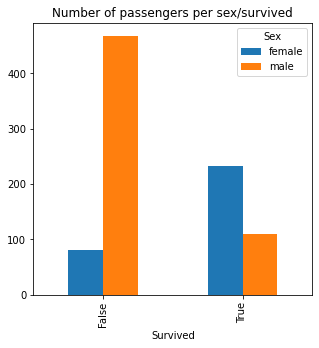

In [612]:
passengers = pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])
print (passengers)
passengers.plot(kind = 'bar',figsize = (5,5))
plt.title('Number of passengers per sex/survived')


Survived  False  True 
Pclass                
1            80    136
2            97     87
3           372    119


Text(0.5, 1.0, 'Class vs Survival')

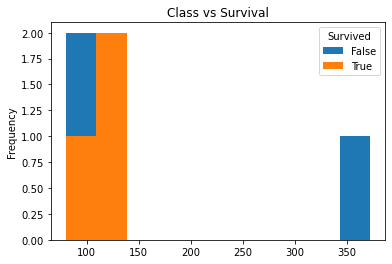

In [628]:
class_survived = pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])
print (class_survived)
titanic_df.groupby('Pclass').Survived.mean()
class_survived.plot(kind = 'bar')
plt.title('Class vs Survival')


In [526]:
titanic_df.dtypes

PassengerId      int64
Survived          bool
Pclass           int64
Name            object
Sex             object
Age            float64
Fare           float64
Embarked        object
dtype: object

In [527]:
titanic_df['Survived'].value_counts()

False    549
True     342
Name: Survived, dtype: int64

Text(0.5, 0, 'Number of Passengers')

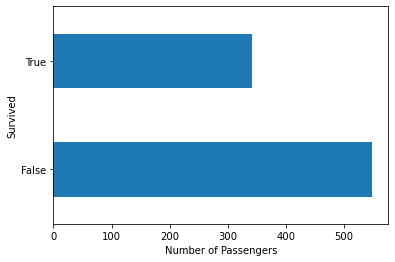

In [613]:
titanic_df['Survived'].value_counts().plot(kind = 'barh')
plt.ylabel('Survived')
plt.xlabel('Number of Passengers')

In [529]:
titanic_df['Survived'].value_counts()*100/titanic_df['Survived'].count()

False    61.616162
True     38.383838
Name: Survived, dtype: float64

Text(0.5, 0, '% of Passengers')

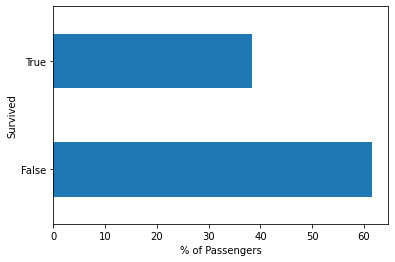

In [592]:
(titanic_df['Survived'].value_counts()*100/titanic_df['Survived'].count()).plot(kind = 'barh')
plt.ylabel('Survived')
plt.xlabel('% ' 'of Passengers')

In [531]:
print (titanic_df[['Sex', 'Survived','Age','Fare']])

Sex  Survived   Age     Fare
0      male     False  22.0   7.2500
1    female      True  38.0  71.2833
2    female      True  26.0   7.9250
3    female      True  35.0  53.1000
4      male     False  35.0   8.0500
..      ...       ...   ...      ...
886    male     False  27.0  13.0000
887  female      True  19.0  30.0000
888  female     False  30.0  23.4500
889    male      True  26.0  30.0000
890    male     False  32.0   7.7500

[891 rows x 4 columns]


In [532]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Number of Passengers per Sex')

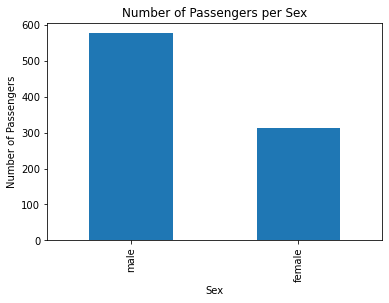

In [533]:
titanic_df['Sex'].value_counts().plot(kind = 'bar')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Sex')

In [534]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Number of Passengers per Class')

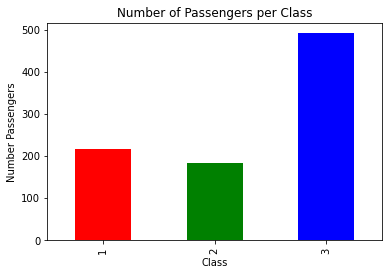

In [535]:
titanic_df['Pclass'].value_counts().sort_index().plot(kind = 'bar', color = ['r','g','b'])
plt.xlabel('Class')
plt.ylabel('Number Passengers')
plt.title('Number of Passengers per Class')

Text(0.5, 1.0, 'Number of Passengers per Sex')

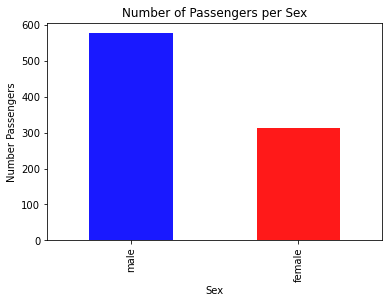

In [536]:
titanic_df['Sex'].value_counts().plot(kind = 'bar', color = ['b','r'], alpha = 0.9)
plt.ylabel('Number Passengers')
plt.xlabel('Sex')
plt.title('Number of Passengers per Sex')

Text(0.5, 1.0, 'Number of passengers grouped by Sex')

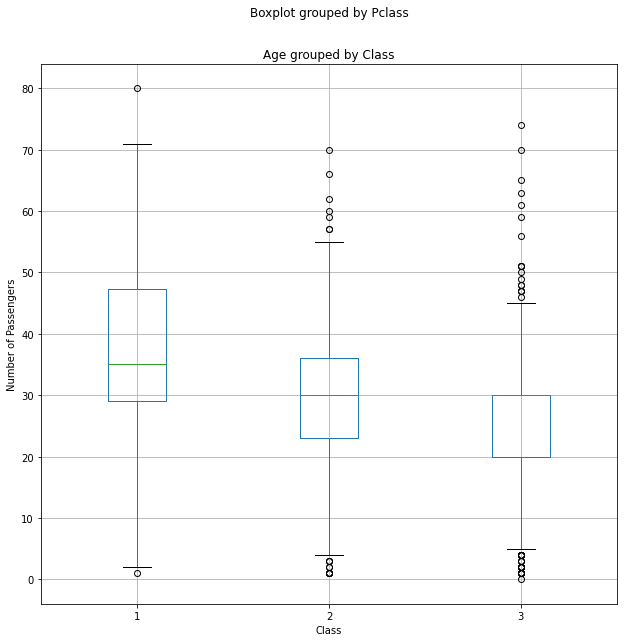

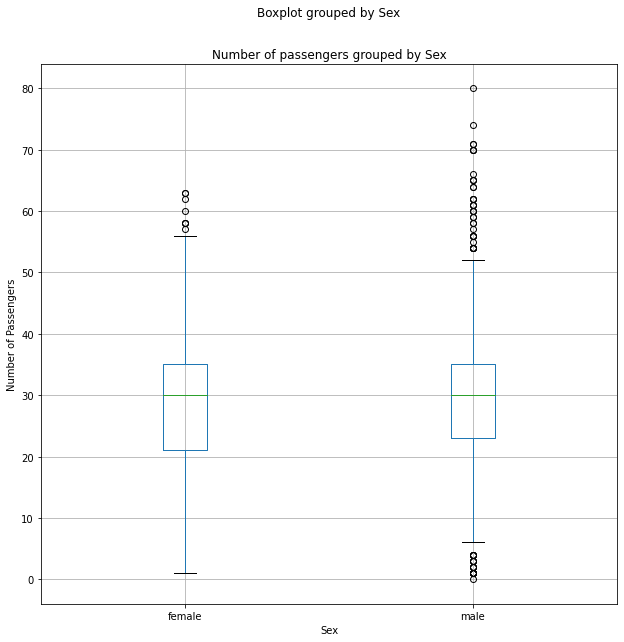

In [537]:
titanic_df.boxplot(column = 'Age',by = ['Pclass'],figsize = (10,10))
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title('Age grouped by Class')
titanic_df.boxplot(column = 'Age',by = ['Sex'],figsize = (10,10))
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Number of passengers grouped by Sex')

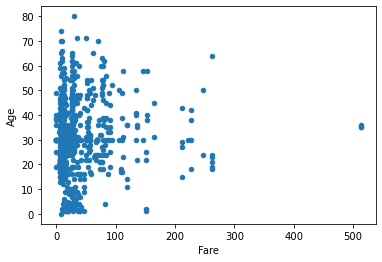

In [538]:
titanic_df.plot.scatter('Fare', 'Age')

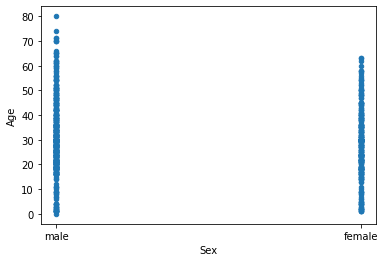

In [559]:
titanic_df.plot.scatter('Sex','Age')

Text(0.5, 1.0, 'Passengers per Age')

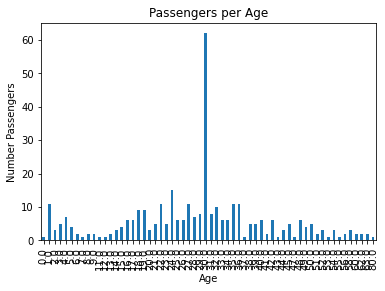

In [560]:
titanic_df[titanic_df['Survived']==1]['Age'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Number Passengers')
plt.title('Passengers per Age')


(5, 10]      7
(10, 15]    11
(15, 20]    33
(20, 25]    42
(25, 30]    94
(30, 35]    41
(35, 40]    28
(40, 45]    17
(45, 50]    16
(50, 55]    10
(55, 60]     7
(60, 65]     4
(65, 70]     0
(70, 75]     0
(75, 80]     1
(80, 85]     0
Name: Age_Grouped, dtype: int64


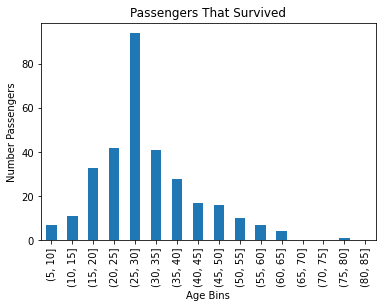

In [619]:
bins = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]
titanic_df['Age_Grouped'] = pd.cut(titanic_df['Age'],bins)
titanic_df[titanic_df['Survived']==True]['Age_Grouped'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Age Bins')
plt.ylabel('Number Passengers')
plt.title('Passengers That Survived')
passengers_per_age_group_survived = titanic_df[titanic_df['Survived']==True]['Age_Grouped'].value_counts().sort_index()
print (passengers_per_age_group_survived)


(5, 10]      13
(10, 15]      8
(15, 20]     64
(20, 25]     79
(25, 30]    193
(30, 35]     45
(35, 40]     41
(40, 45]     28
(45, 50]     23
(50, 55]     14
(55, 60]     11
(60, 65]     10
(65, 70]      4
(70, 75]      3
(75, 80]      0
(80, 85]      0
Name: Age_Grouped, dtype: int64


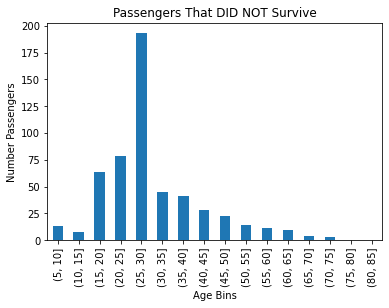

In [621]:
titanic_df[titanic_df['Survived']==False]['Age_Grouped'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Age Bins')
plt.ylabel('Number Passengers')
plt.title('Passengers That DID NOT Survive')
passengers_per_age_group_died = titanic_df[titanic_df['Survived']==False]['Age_Grouped'].value_counts().sort_index()
print (passengers_per_age_group_died)


Age_Grouped
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.340206
(20, 25]    0.347107
(25, 30]    0.327526
(30, 35]    0.476744
(35, 40]    0.405797
(40, 45]    0.377778
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
(80, 85]         NaN
Name: Survived, dtype: float64
(5, 10]      20
(10, 15]     19
(15, 20]     97
(20, 25]    121
(25, 30]    287
(30, 35]     86
(35, 40]     69
(40, 45]     45
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      4
(70, 75]      3
(75, 80]      1
(80, 85]      0
Name: Age_Grouped, dtype: int64


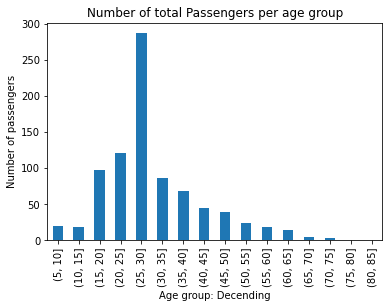

In [625]:
titanic_df['Age_Grouped'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of total Passengers per age group')
plt.xlabel('Age group: Decending')
plt.ylabel('Number of passengers')
print (titanic_df.groupby(['Age_Grouped']).Survived.mean())
print (titanic_df['Age_Grouped'].value_counts().sort_index())


True     136
False     80
Name: Survived, dtype: int64


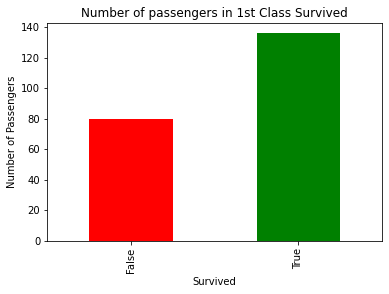

In [576]:
fst_class_survived = titanic_df[titanic_df['Pclass']==1]['Survived'].value_counts()
titanic_df[titanic_df['Pclass']==1]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of passengers in 1st Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (fst_class_survived)

False    97
True     87
Name: Survived, dtype: int64


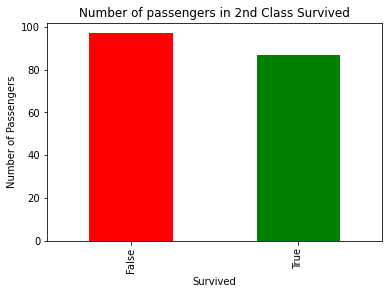

In [577]:
snd_class_survived = titanic_df[titanic_df['Pclass']==2]['Survived'].value_counts()
titanic_df[titanic_df['Pclass']==2]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of passengers in 2nd Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print(snd_class_survived)

False    372
True     119
Name: Survived, dtype: int64


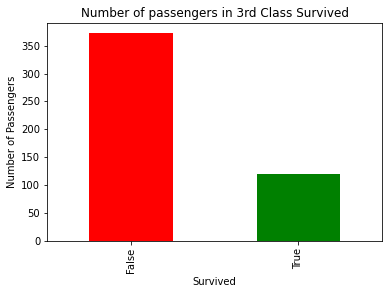

In [581]:
trd_class_survived = titanic_df[titanic_df['Pclass']==3]['Survived'].value_counts()
titanic_df[titanic_df['Pclass']==3]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of passengers in 3rd Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (trd_class_survived)

False    468
True     109
Name: Survived, dtype: int64


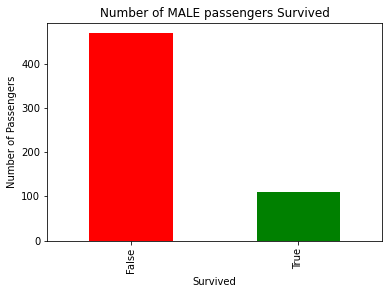

In [582]:
male_survived = titanic_df[titanic_df['Sex']=='male']['Survived'].value_counts()
titanic_df[titanic_df['Sex']=='male']['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of MALE passengers Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (male_survived)

True     233
False     81
Name: Survived, dtype: int64


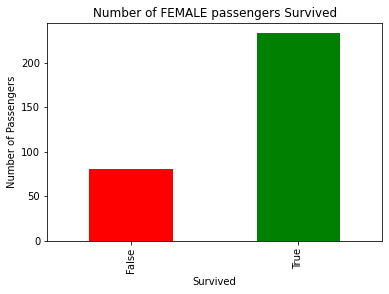

In [575]:
female_survived = titanic_df[titanic_df['Sex']=='female']['Survived'].value_counts()
titanic_df[titanic_df['Sex']=='female']['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of FEMALE passengers Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (female_survived)

False    77
True     45
Name: Survived, dtype: int64


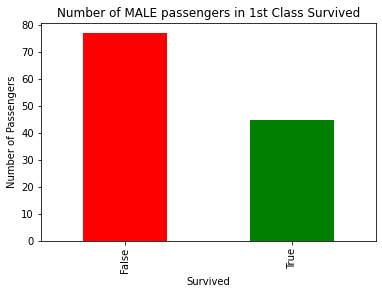

In [587]:
fst_class_male_survived = titanic_df[(titanic_df['Sex']=='male')&(titanic_df['Pclass']==1)]['Survived'].value_counts()
titanic_df[(titanic_df['Sex']=='male')&(titanic_df['Pclass']==1)]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of MALE passengers in 1st Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (fst_class_male_survived)

True     91
False     3
Name: Survived, dtype: int64


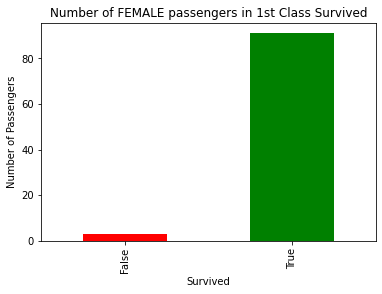

In [588]:
fst_class_female_survived = titanic_df[(titanic_df['Sex']=='female')&(titanic_df['Pclass']==1)]['Survived'].value_counts()
titanic_df[(titanic_df['Sex']=='female')&(titanic_df['Pclass']==1)]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of FEMALE passengers in 1st Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (fst_class_female_survived)

False    300
True      47
Name: Survived, dtype: int64


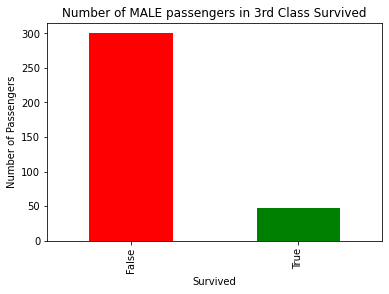

In [590]:
trd_class_male_survived = titanic_df[(titanic_df['Sex']=='male')&(titanic_df['Pclass']==3)]['Survived'].value_counts()
titanic_df[(titanic_df['Sex']=='male')&(titanic_df['Pclass']==3)]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of MALE passengers in 3rd Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (trd_class_male_survived)

True     72
False    72
Name: Survived, dtype: int64


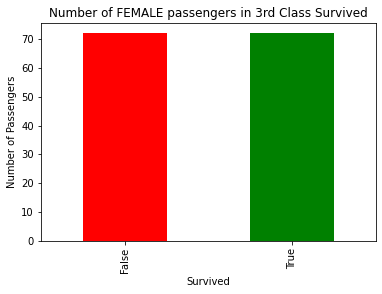

In [591]:
trd_class_female_survived = titanic_df[(titanic_df['Sex']=='female')&(titanic_df['Pclass']==3)]['Survived'].value_counts()
titanic_df[(titanic_df['Sex']=='female')&(titanic_df['Pclass']==3)]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
plt.title('Number of FEMALE passengers in 3rd Class Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
print (trd_class_female_survived)

In [553]:
surname_name = pd.DataFrame(titanic_df.Name.str.split(',',1).tolist(),columns=['Last','First'])

In [554]:
surname_name.head()

,Last,First
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


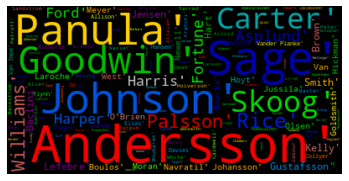

In [555]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
text = surname_name['Last'].values
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud.recolor(colormap = 'nipy_spectral_r',random_state=1),alpha=1,interpolation='bilinear')
plt.axis('off')
plt.show()



In [556]:

mask = np.array(Image.open('452-4520753_vector-illustration-of-sinking-titanic-cruise-ship-sinking.png'))

np.array(wordcloud).shape

(200, 400, 3)

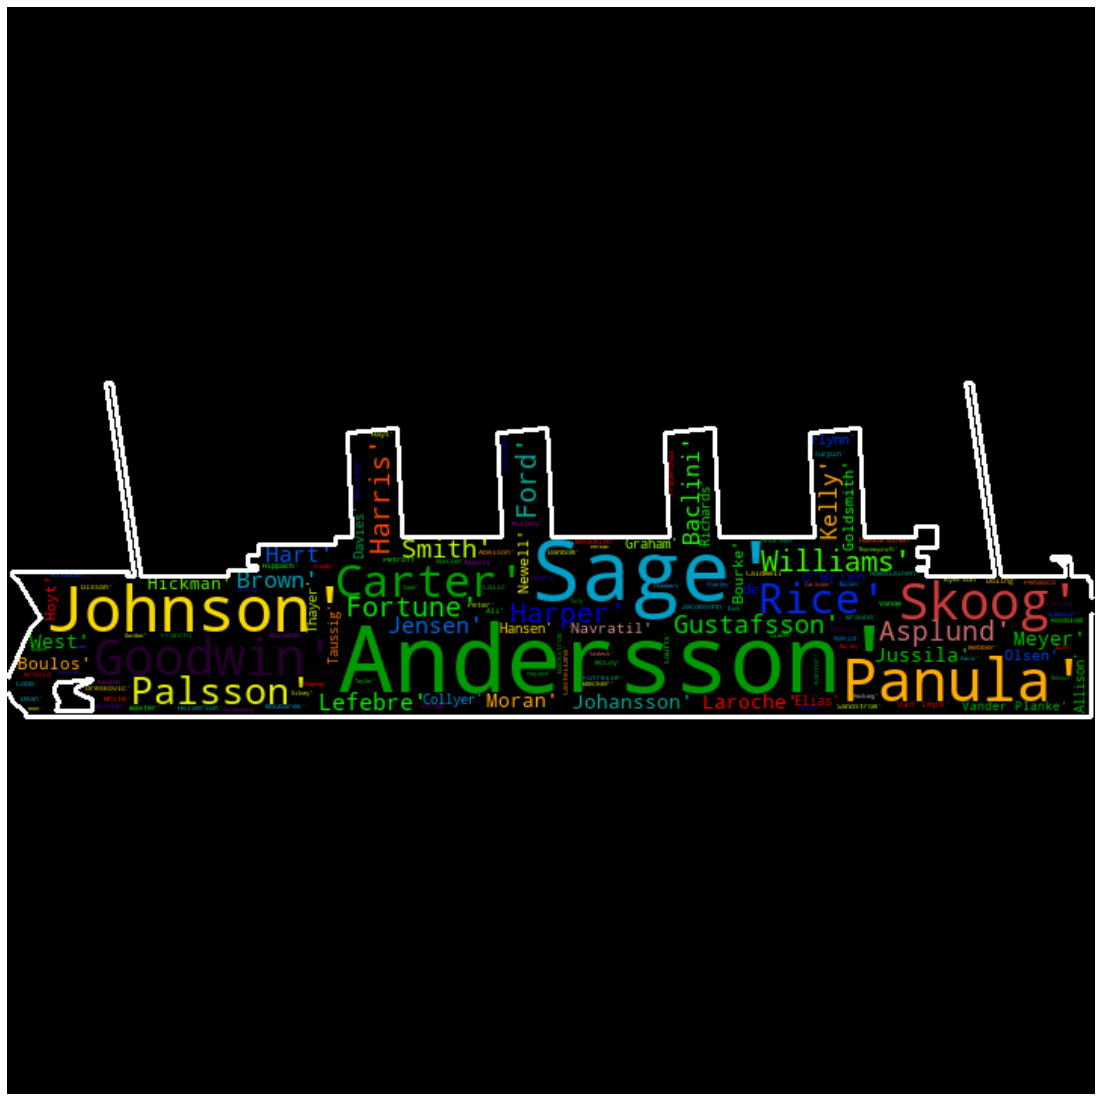

In [557]:
wordcloud = WordCloud(background_color='black',mask=mask,colormap='nipy_spectral_r',contour_color='white',contour_width=2)
wordcloud.generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud,alpha=1,interpolation='bilinear')
plt.axis('off')
plt.show()

